In [1]:
# Mounting the google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
import numpy as np
import cv2
import os
import re
from sklearn import preprocessing

In [3]:
# -------------------- Utility function of reading the folder, subfolder and the image file ------------------------
def normalize_label(str_):
    str_ = str_.replace(" ", "")
    str_ = str_.translate(str_.maketrans("","", "()"))
    str_ = str_.split("_")
    return ''.join(str_[:2])

def normalize_desc(folder, sub_folder):
    text = folder + " - " + sub_folder
    text = re.sub(r'\d+', '', text)
    text = text.replace(".", "")
    text = text.strip()
    return text

def print_progress(val, val_len, folder, sub_folder, filename, bar_size=10):
    progr = "#"*round((val)*bar_size/val_len) + " "*round((val_len - (val))*bar_size/val_len)
    if val == 0:
        print("", end = "\n")
    else:
        print("[%s] folder : %s/%s/ ----> file : %s" % (progr, folder, sub_folder, filename), end="\r")

In [104]:
# -------------------- Load Dataset ------------------------

dataset_dir = "/content/drive/MyDrive/Mamdataset"

imgs = [] #list image matrix
labels = []
descs = []
for folder in os.listdir(dataset_dir):
    for sub_folder in os.listdir(os.path.join(dataset_dir, folder)):
        sub_folder_files = os.listdir(os.path.join(dataset_dir, folder, sub_folder))
        len_sub_folder = len(sub_folder_files) - 1
        for i, filename in enumerate(sub_folder_files):
            img = cv2.imread(os.path.join(dataset_dir, folder, sub_folder, filename))

            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            h, w = gray.shape
            ymin, ymax, xmin, xmax = h//3, h*2//3, w//3, w*2//3
            crop = gray[ymin:ymax, xmin:xmax]

            resize = cv2.resize(crop, (0,0), fx=0.5, fy=0.5)

            imgs.append(resize)
            # labels.append(normalize_label(os.path.splitext(filename)[0]))
            descs.append(normalize_desc(sub_folder, filename))
            labels.append(sub_folder)

            print_progress(i, len_sub_folder, folder, sub_folder, filename)


        print(labels)
        print()
        print(descs)
        print()


['CLAHE(A)', 'CLAHE(A)', 'CLAHE(A)', 'CLAHE(A)', 'CLAHE(A)', 'CLAHE(A)', 'CLAHE(A)', 'CLAHE(A)', 'CLAHE(A)', 'CLAHE(A)', 'CLAHE(A)', 'CLAHE(A)', 'CLAHE(A)', 'CLAHE(A)', 'CLAHE(A)', 'CLAHE(A)', 'CLAHE(A)', 'CLAHE(A)', 'CLAHE(A)', 'CLAHE(A)', 'CLAHE(A)', 'CLAHE(A)', 'CLAHE(A)', 'CLAHE(A)', 'CLAHE(A)', 'CLAHE(A)', 'CLAHE(A)', 'CLAHE(A)', 'CLAHE(A)', 'CLAHE(A)', 'CLAHE(A)', 'CLAHE(A)', 'CLAHE(A)', 'CLAHE(A)', 'CLAHE(A)', 'CLAHE(A)', 'CLAHE(A)', 'CLAHE(A)', 'CLAHE(A)', 'CLAHE(A)', 'CLAHE(A)', 'CLAHE(A)', 'CLAHE(A)', 'CLAHE(A)', 'CLAHE(A)', 'CLAHE(A)', 'CLAHE(A)', 'CLAHE(A)', 'CLAHE(A)', 'CLAHE(A)', 'CLAHE(A)', 'CLAHE(A)', 'CLAHE(A)', 'CLAHE(A)', 'CLAHE(A)', 'CLAHE(A)', 'CLAHE(A)', 'CLAHE(A)', 'CLAHE(A)', 'CLAHE(A)', 'CLAHE(A)', 'CLAHE(A)', 'CLAHE(A)', 'CLAHE(A)', 'CLAHE(A)', 'CLAHE(A)', 'CLAHE(A)', 'CLAHE(A)', 'CLAHE(A)', 'CLAHE(A)', 'CLAHE(A)', 'CLAHE(A)', 'CLAHE(A)', 'CLAHE(A)', 'CLAHE(A)', 'CLAHE(A)', 'CLAHE(A)', 'CLAHE(A)', 'CLAHE(A)', 'CLAHE(A)', 'CLAHE(A)', 'CLAHE(A)', 'CLAHE(A)', 'C

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(imgs[5])

In [ ]:
for img in range(len(imgs)):
  print(imgs[img].shape)

In [ ]:
import cv2

def reshape_images(images, target_shape):
    reshaped_images = []
    for image in images:
        # Read the image with OpenCV
        # cv_image = cv2.imread(image)

        # Resize the image to the target shape
        resized_image = cv2.resize(image, target_shape)

        reshaped_images.append(resized_image)

    return reshaped_images

imgs = reshape_images(imgs, (220,220))

for img in range(len(imgs)):
  print(imgs[img].shape)

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(imgs[500])

In [142]:
# Extracting the features form the images using GLCM algorithm

from skimage.feature import graycomatrix, graycoprops

# ----------------- calculate greycomatrix() & greycoprops() for angle 0, 45, 90, 135 ----------------------------------
def calc_glcm_all_agls(img, label, props, dists=[5], agls=[0, np.pi/4, np.pi/2, 3*np.pi/4], lvl=256, sym=True, norm=True):

    glcm = graycomatrix(img,
                        distances=dists,
                        angles=agls,
                        levels=lvl,
                        symmetric=sym,
                        normed=norm)
    feature = []
    glcm_props = [propery for name in props for propery in graycoprops(glcm, name)[0]]
    for item in glcm_props:
            feature.append(item)
    feature.append(label)

    return feature


# ----------------- call calc_glcm_all_agls() for all properties ----------------------------------
properties = ['dissimilarity', 'correlation', 'homogeneity', 'contrast']

glcm_all_agls = []
for img, label in zip(imgs, labels):
    glcm_all_agls.append(
            calc_glcm_all_agls(img,
                                label,
                                props=properties)
                            )

columns = []
angles = ['0', '45', '90','135']
for name in properties :
    for ang in angles:
        columns.append(name + "_" + ang)

columns.append("label")

In [144]:
# preparing the dataframe and the csv of the main data

import pandas as pd

# Create the pandas DataFrame for GLCM features data
glcm_df = pd.DataFrame(glcm_all_agls,
            columns = columns)
label_encoder = preprocessing.LabelEncoder()

# Encode labels in column 'species'.
glcm_df['label']= label_encoder.fit_transform(glcm_df['label'])

glcm_df['label'].unique()
glcm_df.head(15)
# glcm_df = glcm_df.drop(glcm_df.columns[0], axis=1)

glcm_df.to_csv('glcm_df_csv.csv')
glcm_describe=glcm_df.describe()
glcm_describe.to_csv('glcm_describe.csv')

In [ ]:
# reading the main data csv
df=pd.read_csv('glcm_df_csv.csv')
df.head()

In [ ]:
# droping the useless column
df = df.drop('Unnamed: 0', axis=1)
df.head()

In [ ]:
df.info()

In [ ]:
# lable encoding the label column
from sklearn.preprocessing import LabelEncoder
yle = LabelEncoder()
df['label'] = yle.fit_transform(df['label'])
df.info()

In [149]:
# preparing the input and the output for the training

#X = data.iloc[:, :-1]
#y = data.iloc[:, -1]
X = df.drop(['label'], axis=1)
y = df['label']

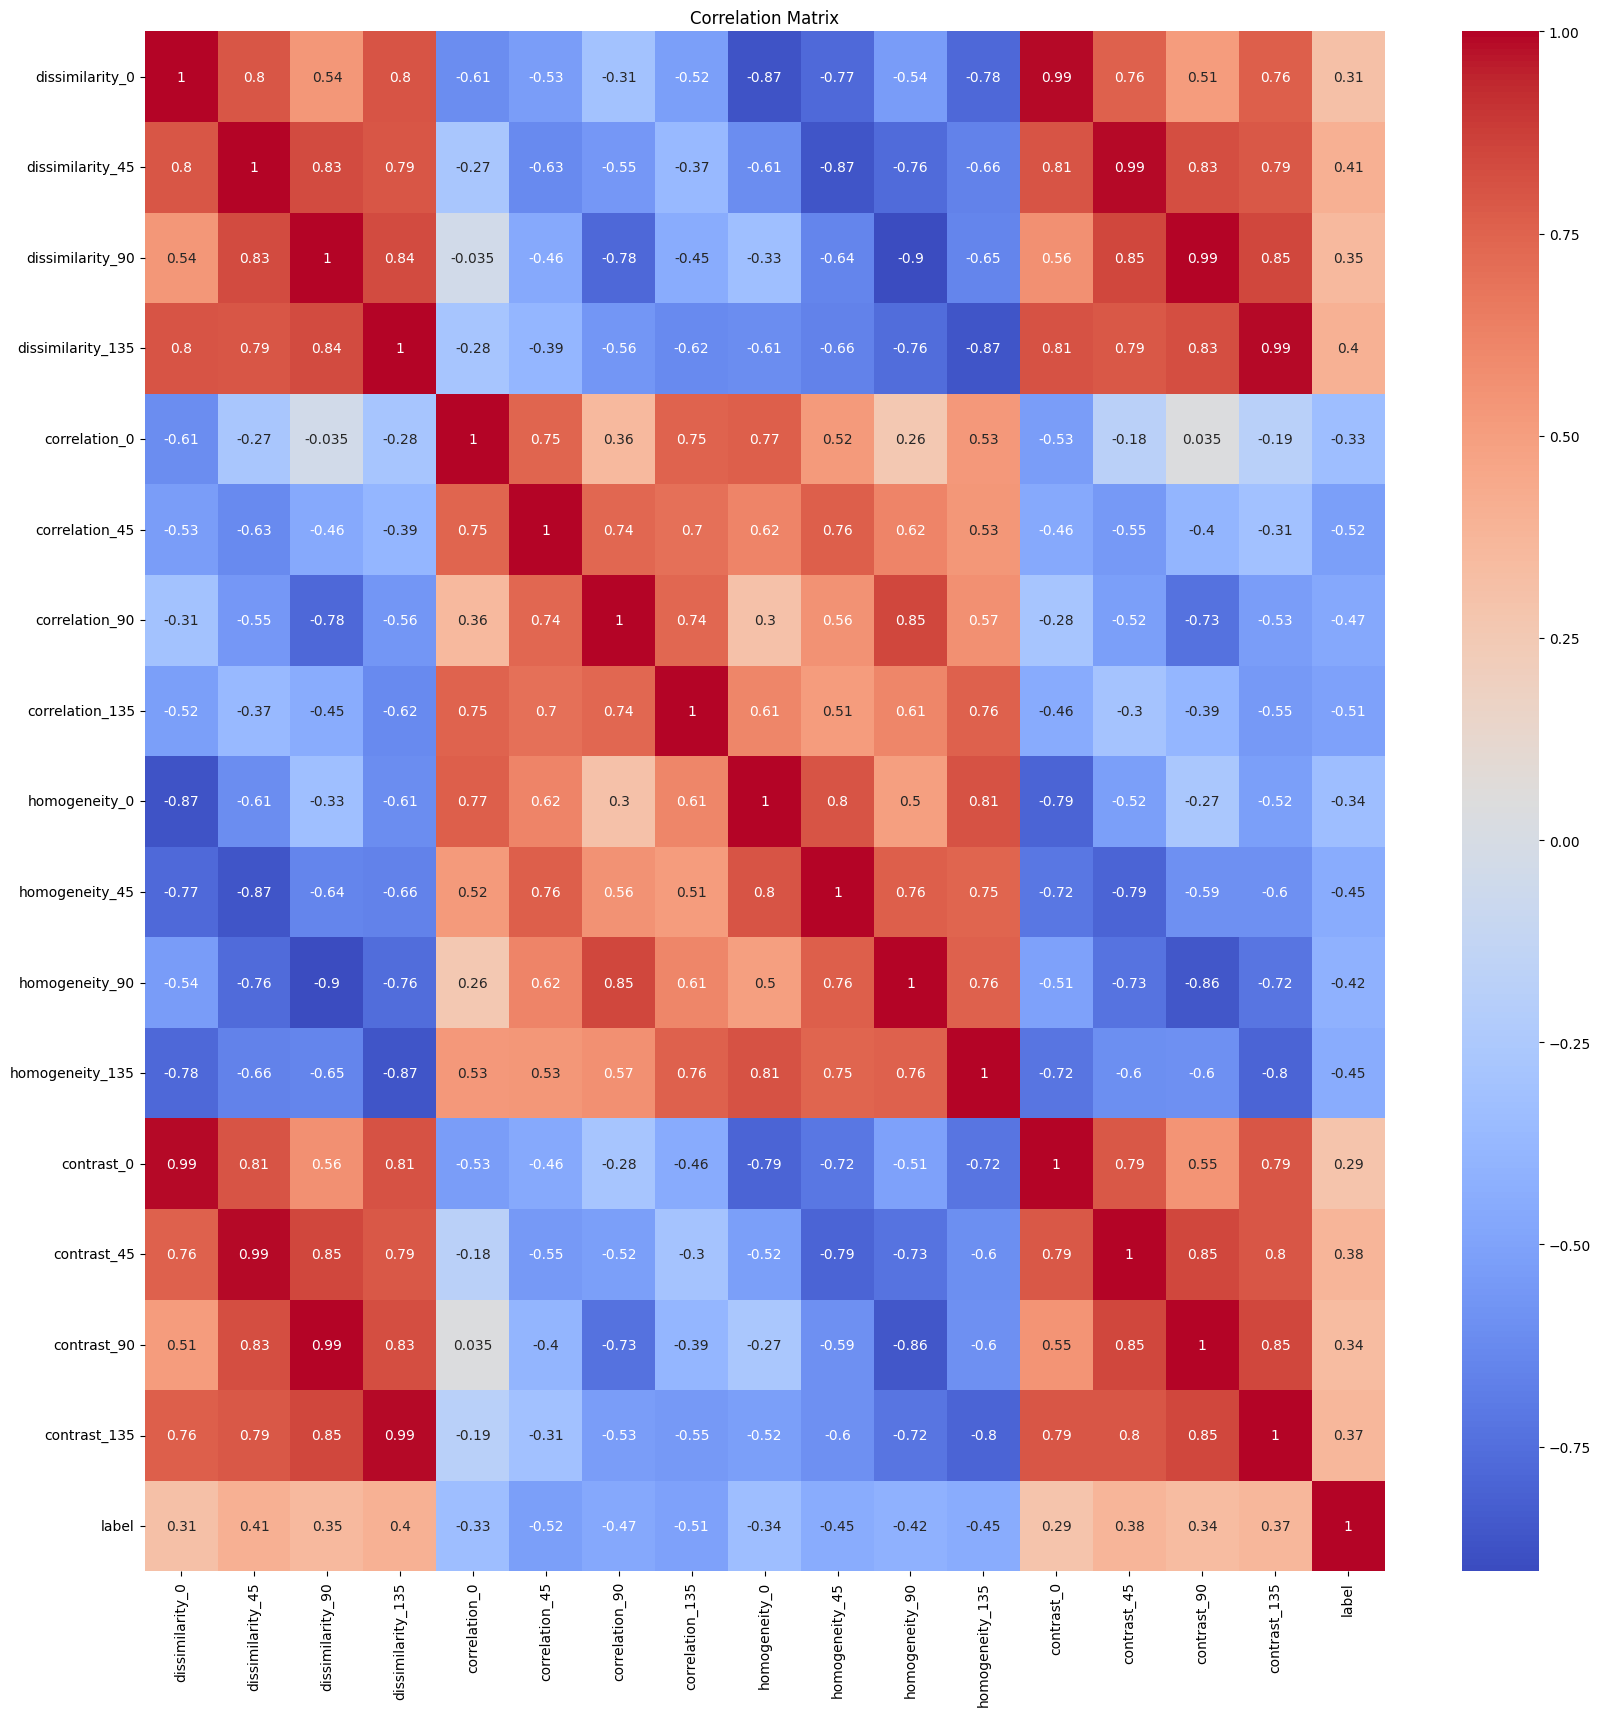

In [150]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset into a pandas DataFrame
data = glcm_df

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [151]:
X = X.to_numpy()
y = y.to_numpy().transpose()

In [152]:
m,n = X.shape
print(m,n)
o = y.shape
print(o)

3000 16
(3000,)


In [153]:
# building the model
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping


# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Convert labels to categorical
num_classes = len(np.unique(y))
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [155]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Create your model
model = Sequential()
model.add(Dense(128, activation='relu', input_dim=X_train.shape[1]))
model.add(Dropout(0.3))  # Add dropout layer

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))  # Add dropout layer

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))  # Add dropout layer

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))  # Add dropout layer

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))  # Add dropout layer

model.add(Dense(num_classes, activation='softmax'))

# 15.81


In [156]:
model.summary()
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])

Model: "sequential_34"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_131 (Dense)           (None, 128)               2176      
                                                                 
 dropout_80 (Dropout)        (None, 128)               0         
                                                                 
 dense_132 (Dense)           (None, 256)               33024     
                                                                 
 dropout_81 (Dropout)        (None, 256)               0         
                                                                 
 dense_133 (Dense)           (None, 512)               131584    
                                                                 
 dropout_82 (Dropout)        (None, 512)               0         
                                                                 
 dense_134 (Dense)           (None, 256)             

19/19 [==============================] - 0s 2ms/step - loss: 0.0218 - accuracy: 0.9933
Test Accuracy: 0.9933333396911621


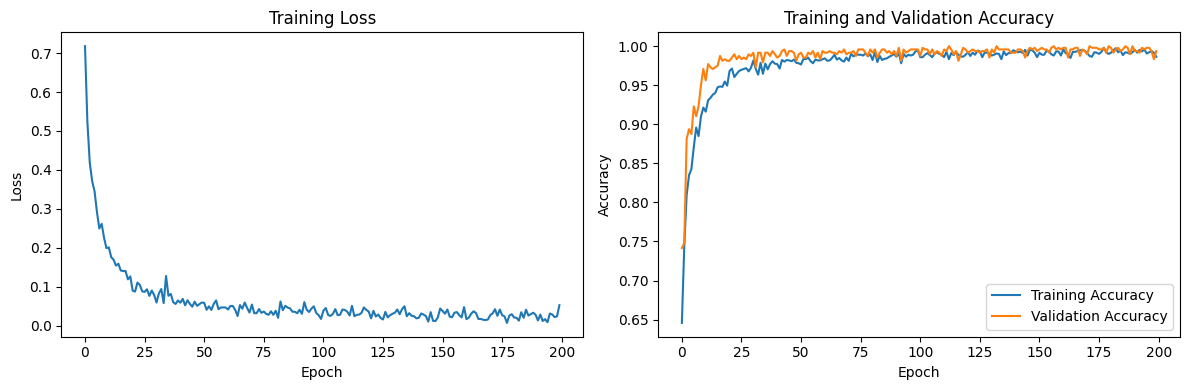

In [157]:
early_stopping = EarlyStopping(patience=100, restore_best_weights=True)
# Train the model with early stopping
history = model.fit(X_train, y_train, validation_split=0.2, epochs=200, batch_size=32, verbose=0, callbacks=[early_stopping])

# Evaluate the model
loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", test_accuracy)

# Plot the training loss and accuracy
plt.figure(figsize=(12, 4))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')

# Plot training accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


In [158]:
# Predict on new data
new_data = np.array([X[41]])
print(new_data)
predictions = model.predict(new_data)
print('Predictions:', predictions)
print('label:', y[41])

[[5.38457505e+01 6.29304055e+01 6.14871882e+01 5.61855496e+01
  4.93914872e-01 3.33466261e-01 3.63267445e-01 4.52377167e-01
  2.52724204e-02 2.13505359e-02 2.32362946e-02 2.50687203e-02
  4.99243112e+03 6.59443958e+03 6.32723983e+03 5.41599801e+03]]
1/1 [==============================] - 0s 62ms/step
Predictions: [[0. 1. 0.]]
label: 0


19/19 [==============================] - 0s 2ms/step


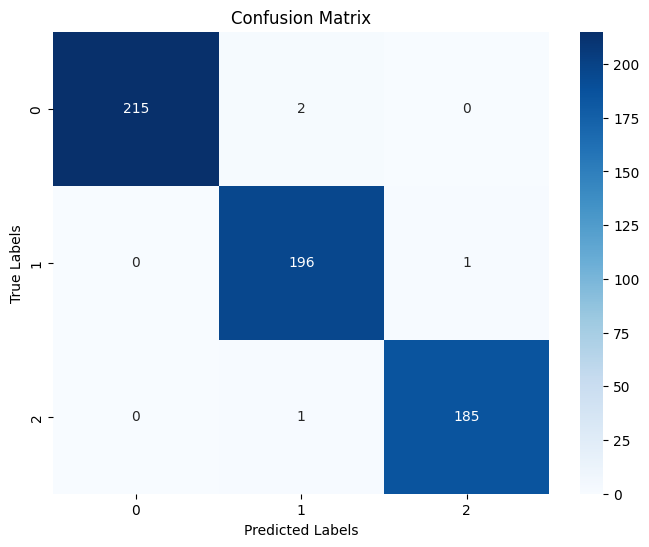

In [159]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# Create the confusion matrix
cm = confusion_matrix(y_true_labels, y_pred_labels)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


19/19 [==============================] - 0s 2ms/step


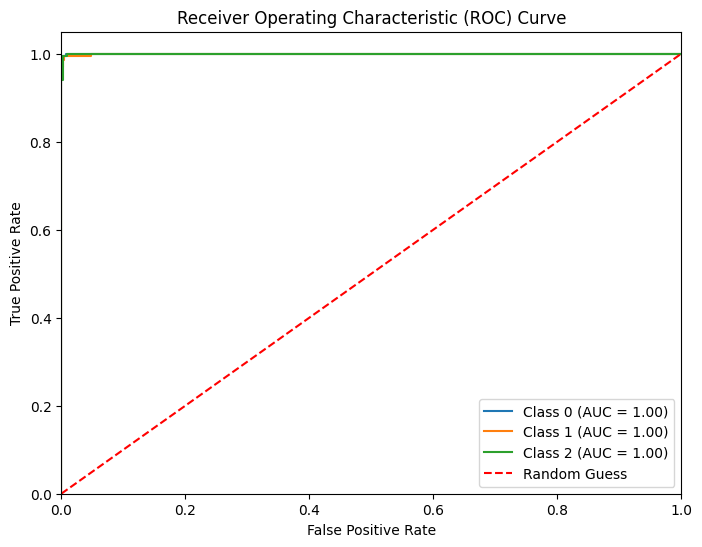

In [161]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# Convert y_true_labels to one-hot encoded format
y_true_binary = label_binarize(y_true_labels, classes=np.unique(y_true_labels))

# Compute the ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
num_classes = y_true_binary.shape[1]
for i in range(num_classes):
    fpr[i], tpr[i], _ = roc_curve(y_true_binary[:, i], y_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(num_classes):
    plt.plot(fpr[i], tpr[i], label='Class {} (AUC = {:.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [163]:
from sklearn.metrics import classification_report
from tabulate import tabulate

# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# Generate the classification report
report = classification_report(y_true_labels, y_pred_labels, output_dict=True)

# Convert the report to a table
table = []
for key, value in report.items():
    if key in ["accuracy", "macro avg", "weighted avg"]:
        continue
    table.append([key, value["precision"], value["recall"], value["f1-score"], value["support"]])

# Print the formatted table
headers = ["Class", "Precision", "Recall", "F1-Score", "Support"]
print(tabulate(table, headers, tablefmt="github"))


19/19 [==============================] - 0s 5ms/step
|   Class |   Precision |   Recall |   F1-Score |   Support |
|---------|-------------|----------|------------|-----------|
|       0 |    1        | 0.990783 |   0.99537  |       217 |
|       1 |    0.984925 | 0.994924 |   0.989899 |       197 |
|       2 |    0.994624 | 0.994624 |   0.994624 |       186 |
